In [1]:
import os
import torch
import struct
import scipy
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

# from auditory_cortex.neural_data.ucdavis_dataset import NeuralData
# from auditory_cortex.neural_data.ucsf_data.ucsf_dataset import UCSFDataset
# from auditory_cortex.neural_data.ucdavis_data.ucdavis_dataset import UCDavisDataset
from auditory_cortex.dnn_feature_extractor import create_feature_extractor
from auditory_cortex.neural_data import UCDavisDataset, UCSFDataset, create_neural_dataset
from auditory_cortex.dataloader2 import DataLoader
from auditory_cortex.data_assembler import STRFDataAssembler, DNNDataAssembler
from auditory_cortex.encoding import TRF
import numpy as np
%matplotlib inline
import logging

# Configure the logging system
logging.basicConfig(
    level=logging.INFO,  # Set the logging level
    # format="%(name)s - %(message)s",
	# format="%(name)s - %(levelname)s - %(message)s",
)

/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


In [22]:
trial_ids = np.arange(3)
trial_ids

array([0, 1, 2])

In [48]:
num_trials = 3
trial_ids = np.random.choice(3, size=num_trials, replace=False)
trial_ids

array([2, 0, 1])

In [56]:
total_trial_repeats = 3
trial_ids = np.random.choice(3, size=num_trials, replace=True)
trial_ids

array([1, 0, 2])

In [57]:
max_num_trials =3
num_trials = 3
trial_ids = np.random.choice(max_num_trials, size=num_trials, replace=True)
trial_ids

array([1, 0, 0])

In [ ]:
total_trial_repeats = y_all_trials.shape[0]
	trial_ids = np.arange(total_trial_repeats)
	if test_trial is not None:
		np.random.shuffle(trial_ids)
		trial_ids = trial_ids[:test_trial]

### exploring data...

In [2]:
dataset_name = 'ucsf'
session_id = 200206
dataset_obj = create_neural_dataset(dataset_name, session_id)

# print(f"Experiments: {dataset_obj.exp_tr_data.keys()}")


INFO:auditory_cortex.neural_data.ucsf_data.ucsf_dataset:NeuralData:  Creating object for session: 200206 ... 


INFO:auditory_cortex.neural_data.ucsf_data.ucsf_dataset:Done.


In [5]:
mVocs = False
# stim_duration = dataset_obj.total_stimuli_duration(mVocs)
stim_ids = dataset_obj.get_training_stim_ids(mVocs)
duration = 0
for stim_id in stim_ids:
    duration += dataset_obj.get_stim_duration(stim_id)
print(f"Total stimuli duration: {duration:.2f}")


# print(f"Unique stimuli duration: {stim_duration['unique']:.2f}")
# print(f"Repeated stimuli duration: {stim_duration['repeated']:.2f}")

Total stimuli duration: 1005.54


#### timit stimuli...

In [30]:
mVocs = False
stim_duration = dataset_obj.total_stimuli_duration(mVocs)

print(f"Unique stimuli duration: {stim_duration['unique']:.2f}")
print(f"Repeated stimuli duration: {stim_duration['repeated']:.2f}")

Unique stimuli duration: 762.45
Repeated stimuli duration: 84.83


In [20]:
mVocs = False
repeated=True
spikes = dataset_obj.extract_spikes(repeated=repeated, mVocs=mVocs)

stimuli_type = 'unique' if not repeated else 'repeated'
print(f"For '{stimuli_type}' stimuli: ")
stim_ids = list(spikes.keys())
print(f"Number of stumiuli: {len(stim_ids)}")
channels = list(spikes[stim_ids[0]].keys())
print(f"Number of channels: {len(channels)}")
print(f"Channel IDs: {channels}")
print(f"Shape of spikes: {spikes[stim_ids[0]][channels[0]].shape}")
print(f"Number of repeats: {spikes[stim_ids[0]][channels[0]].shape[0]}")

For 'repeated' stimuli: 
Number of stumiuli: 46
Number of channels: 4
Channel IDs: ['WM_1', 'WM_2', 'WM_3', 'WM_4']
Shape of spikes: (3, 41)
Number of repeats: 3


In [21]:
mVocs = False
repeated=False
spikes = dataset_obj.extract_spikes(repeated=repeated, mVocs=mVocs)

stimuli_type = 'unique' if not repeated else 'repeated'
print(f"For '{stimuli_type}' stimuli: ")
stim_ids = list(spikes.keys())
print(f"Number of stumiuli: {len(stim_ids)}")
channels = list(spikes[stim_ids[0]].keys())
print(f"Number of channels: {len(channels)}")
print(f"Channel IDs: {channels}")
print(f"Shape of spikes: {spikes[stim_ids[0]][channels[0]].shape}")
print(f"Number of repeats: {spikes[stim_ids[0]][channels[0]].shape[0]}")

For 'unique' stimuli: 
Number of stumiuli: 451
Number of channels: 4
Channel IDs: ['WM_1', 'WM_2', 'WM_3', 'WM_4']
Shape of spikes: (1, 39)
Number of repeats: 1


#### mVocs stimuli...

In [10]:
mVocs = True
stim_duration = dataset_obj.total_stimuli_duration(mVocs)

print(f"Unique stimuli duration: {stim_duration['unique']:.2f}")
print(f"Repeated stimuli duration: {stim_duration['repeated']:.2f}")

Unique stimuli duration: 900.25
Repeated stimuli duration: 100.07


In [8]:
mVocs = True
repeated=True
spikes = dataset_obj.extract_spikes(repeated=repeated, mVocs=mVocs)

stimuli_type = 'unique' if not repeated else 'repeated'
print(f"For '{stimuli_type}' stimuli: ")
stim_ids = list(spikes.keys())
print(f"Number of stumiuli: {len(stim_ids)}")
channels = list(spikes[stim_ids[0]].keys())
print(f"Number of channels: {len(channels)}")
print(f"Channel IDs: {channels}")
print(f"Shape of spikes: {spikes[stim_ids[0]][channels[0]].shape}")
print(f"Number of repeats: {spikes[stim_ids[0]][channels[0]].shape[0]}")

For 'repeated' stimuli: 
Number of stumiuli: 153
Number of channels: 4
Channel IDs: ['WM_1', 'WM_2', 'WM_3', 'WM_4']
Shape of spikes: (3, 21)
Number of repeats: 3


In [10]:
mVocs = True
repeated=False
spikes = dataset_obj.extract_spikes(repeated=repeated, mVocs=mVocs)

stimuli_type = 'unique' if not repeated else 'repeated'
print(f"For '{stimuli_type}' stimuli: ")
stim_ids = list(spikes.keys())
print(f"Number of stumiuli: {len(stim_ids)}")
channels = list(spikes[stim_ids[0]].keys())
print(f"Number of channels: {len(channels)}")
print(f"Channel IDs: {channels}")
print(f"Shape of spikes: {spikes[stim_ids[0]][channels[0]].shape}")
print(f"Number of repeats: {spikes[stim_ids[0]][channels[0]].shape[0]}")

For 'unique' stimuli: 
Number of stumiuli: 1415
Number of channels: 4
Channel IDs: ['WM_1', 'WM_2', 'WM_3', 'WM_4']
Shape of spikes: (1, 15)
Number of repeats: 1


In [4]:
unique_stim_ids = dataset_obj.get_stim_ids(mVocs)['unique']

In [5]:
for stim_id in unique_stim_ids:
	stim_dur = dataset_obj.metadata.mVocs_dur_dict[stim_id]
	if np.isnan(stim_dur):
		print(f"Stimulus ID: {stim_id} is NaN")
		break

In [6]:
stim_id

'43-Cue-03-Grunt.wfm'

In [ ]:
if stim_id in mVocs_wfm_files:
	print(f"stim file exists")
else:
	print(f"stim file does not exist")

In [15]:
dataset_obj.metadata.mVocs_meta['MSL']._fieldnames

['SoundID',
 'SourceNum',
 'CueNum',
 'Dur',
 'VocType',
 'useThisSound',
 'jeffVocType',
 'actualDur',
 'WFMname',
 'indUsed3',
 'indUsed12',
 'indUsed',
 'attenuationSpeaker1']

In [17]:
dataset_obj.metadata.mVocs_meta['MSL'].Dur.shape

(3046,)

In [19]:
dataset_obj.metadata.mVocs_meta['MSL'].actualDur.shape

(3046,)

In [20]:
dataset_obj.metadata.mVocs_meta['MSL'].WFMname.shape

(3046,)

In [23]:
np.where(dataset_obj.metadata.mVocs_meta['MSL'].WFMname == stim_id)

(array([534]),)

In [31]:
dataset_obj.metadata.mVocs_meta['MSL'].Dur[534]

nan

In [32]:
dataset_obj.metadata.mVocs_meta['MSL'].actualDur[534]

0.792875

In [29]:
aud = dataset_obj.metadata.get_stim_audio(stim_id, mVocs=True)

In [30]:
aud.size/48000

0.792875

In [10]:
mVocs_wfm_files = np.array(os.listdir(os.path.join(dataset_obj.data_dir, 'NIMH_Mvoc_WFM'))).astype(str)
print(f"mVocs waveforms in directory: {mVocs_wfm_files.size}")

mVocs_ids_used = np.array(dataset_obj.metadata.mVocs_ids).astype(str)
print(f"mVocs stimuli used (as per metadata): {mVocs_ids_used.size}")

mVocs waveforms in directory: 3040
mVocs stimuli used (as per metadata): 3046


In [4]:
mVocs = True
repeated=True
spikes = dataset_obj.extract_spikes(repeated=repeated, mVocs=mVocs)

stimuli_type = 'unique' if not repeated else 'repeated'
print(f"For '{stimuli_type}' stimuli: ")
stim_ids = list(spikes.keys())
print(f"Number of stumiuli: {len(stim_ids)}")
channels = list(spikes[stim_ids[0]].keys())
print(f"Number of channels: {len(channels)}")
print(f"Channel IDs: {channels}")
print(f"Shape of spikes: {spikes[stim_ids[0]][channels[0]].shape}")
print(f"Number of repeats: {spikes[stim_ids[0]][channels[0]].shape[0]}")

For 'repeated' stimuli: 
Number of stumiuli: 153
Number of channels: 4
Channel IDs: ['WM_1', 'WM_2', 'WM_3', 'WM_4']
Shape of spikes: (3, 21)
Number of repeats: 3


In [ ]:
mVocs = True
repeated=False
spikes = dataset_obj.extract_spikes(repeated=repeated, mVocs=mVocs)

stimuli_type = 'unique' if not repeated else 'repeated'
print(f"For '{stimuli_type}' stimuli: ")
stim_ids = list(spikes.keys())
print(f"Number of stumiuli: {len(stim_ids)}")
channels = list(spikes[stim_ids[0]].keys())
print(f"Number of channels: {len(channels)}")
print(f"Channel IDs: {channels}")
print(f"Shape of spikes: {spikes[stim_ids[0]][channels[0]].shape}")
print(f"Number of repeats: {spikes[stim_ids[0]][channels[0]].shape[0]}")

#### mVocs stimuli discrepency...

In [48]:
timit_wfm_files = os.listdir(os.path.join(dataset_obj.data_dir, 'TIMIT_48000'))
print(f"TIMIT waveforms in directory: {len(timit_wfm_files)}")

timit_ids_used = dataset_obj.metadata.timit_ids
print(f"Timit stimuli used (as per metadata): {len(timit_ids_used)}")

TIMIT waveforms in directory: 499
Timit stimuli used (as per metadata): 497


In [3]:
mVocs_wfm_files = np.array(os.listdir(os.path.join(dataset_obj.data_dir, 'NIMH_Mvoc_WFM'))).astype(str)
print(f"mVocs waveforms in directory: {mVocs_wfm_files.size}")

mVocs_ids_used = np.array(dataset_obj.metadata.mVocs_ids).astype(str)
print(f"mVocs stimuli used (as per metadata): {mVocs_ids_used.size}")

mVocs waveforms in directory: 3040
mVocs stimuli used (as per metadata): 2198


In [4]:
mVocs_ids_rec_data = dataset_obj.exp_stim_ids['BMM3']
mVocs_ids_rec_data = np.concatenate([mVocs_ids_rec_data['unique'], mVocs_ids_rec_data['repeated']]).astype(str)
print(f"mVocs stimuli used (as per recording): {mVocs_ids_rec_data.size}")

files_available = mVocs_ids_rec_data[np.isin(mVocs_ids_rec_data, mVocs_ids_used, invert=False)]
files_not_available = mVocs_ids_rec_data[np.isin(mVocs_ids_rec_data, mVocs_ids_used, invert=True)]
print(f"Files available: {files_available.size}")
print(f"Files not available: {files_not_available.size}")

mVocs stimuli used (as per recording): 1568
Files available: 1116
Files not available: 452


In [68]:
if '03-Cue-263-Coo.wfm' in mVocs_wfm_files:
	print("File available")
else:
	print("File not available")

File available


In [59]:
files_not_available

array(['20-Cue-16-Scream.wfm', '10-Cue-02-Coo.wfm',
       '35-Cue-208-Scream.wfm', '03-Cue-263-Coo.wfm',
       '38-Cue-04-Scream.wfm', '47-Cue-262-Grunt.wfm',
       '12-Cue-57-Grunt.wfm', '26-Cue-65-Coo.wfm', '46-Cue-11-Grunt.wfm',
       '8-Cue-117-Coo.wfm', '42-Cue-04-Grunt.wfm', '22-Cue-136-Coo.wfm',
       '8-Cue-70-Coo.wfm', '25-Cue-23-Scream.wfm', '35-Cue-50-Grunt.wfm',
       '20-Cue-04-Scream.wfm', '38-Cue-02-Scream.wfm',
       '03-Cue-412-Scream.wfm', '15-Cue-152-Coo.wfm', '15-Cue-54-Coo.wfm',
       '47-Cue-81-Coo.wfm', '03-Cue-116-Grunt.wfm', '35-Cue-19-Grunt.wfm',
       '12-Cue-133-Scream.wfm', '03-Cue-255-Coo.wfm',
       '03-Cue-257-Coo.wfm', '04-Cue-16-Coo.wfm', '34-Cue-14-Coo.wfm',
       '28-Cue-17-Coo.wfm', '21-Cue-56-Grunt.wfm', '35-Cue-107-Grunt.wfm',
       '03-Cue-524-Grunt.wfm', '03-Cue-188-Coo.wfm',
       '47-Cue-293-Grunt.wfm', '15-Cue-37-Coo.wfm',
       '12-Cue-23-Scream.wfm', '34-Cue-61-Scream.wfm',
       '8-Cue-110-Coo.wfm', '03-Cue-184-Grunt.wfm',
 

In [55]:
mVocs_ids_rec_data[np.isin(mVocs_ids_rec_data, mVocs_ids_used, invert=False)]

(1116,)

In [56]:
mVocs_ids_rec_data[np.isin(mVocs_ids_rec_data, mVocs_ids_used, invert=True)].shape

(452,)

In [43]:
dataset_obj.exp_stim_ids
total_stim_ids

{'BMM3': {'unique': array(['20-Cue-16-Scream.wfm', '10-Cue-02-Coo.wfm',
         '35-Cue-208-Scream.wfm', ..., '40-Cue-16-Grunt.wfm',
         '03-Cue-488-Coo.wfm', '43-Cue-03-Grunt.wfm'], dtype='<U21'),
  'repeated': array(['03-Cue-04-Coo.wfm', '03-Cue-11-Grunt.wfm', '03-Cue-145-Grunt.wfm',
         '03-Cue-198-Grunt.wfm', '03-Cue-210-Grunt.wfm',
         '03-Cue-214-Coo.wfm', '03-Cue-222-Grunt.wfm', '03-Cue-245-Coo.wfm',
         '03-Cue-254-Coo.wfm', '03-Cue-262-Coo.wfm',
         '03-Cue-288-Scream.wfm', '03-Cue-291-Scream.wfm',
         '03-Cue-30-Grunt.wfm', '03-Cue-303-Coo.wfm',
         '03-Cue-358-Scream.wfm', '03-Cue-381-Scream.wfm',
         '03-Cue-392-Coo.wfm', '03-Cue-393-Scream.wfm',
         '03-Cue-400-Scream.wfm', '03-Cue-418-Scream.wfm',
         '03-Cue-433-Scream.wfm', '03-Cue-446-Coo.wfm',
         '03-Cue-471-Scream.wfm', '03-Cue-501-Scream.wfm',
         '03-Cue-52-Grunt.wfm', '03-Cue-72-Grunt.wfm',
         '03-Cue-75-Grunt.wfm', '04-Cue-01-Coo.wfm', '04-Cue-06

In [ ]:
mVocs = True
repeated=True
spikes = dataset_obj.extract_spikes(repeated=repeated, mVocs=mVocs)

stimuli_type = 'unique' if not repeated else 'repeated'
print(f"For '{stimuli_type}' stimuli: ")
stim_ids = list(spikes.keys())
print(f"Number of stumiuli: {len(stim_ids)}")
channels = list(spikes[stim_ids[0]].keys())
print(f"Number of channels: {len(channels)}")
print(f"Channel IDs: {channels}")
print(f"Shape of spikes: {spikes[stim_ids[0]][channels[0]].shape}")
print(f"Number of repeats: {spikes[stim_ids[0]][channels[0]].shape[0]}")

In [13]:
stim_duration = dataset_obj.total_stimuli_duration(mVocs)
print(f"Unique stimuli duration: {stim_duration['unique']:.2f}")
print(f"Repeated stimuli duration: {stim_duration['repeated']:.2f}")

Unique stimuli duration: 762.45
Repeated stimuli duration: 84.83


### setting up the dataset...

In [2]:
dataset_name = 'ucdavis'
session_id = 0

model_name = "whisper_base"
contextualized = False
shuffled = False
mVocs = True

dataset_obj = create_neural_dataset(dataset_name, session_id)
feature_extractor = create_feature_extractor(model_name, shuffled=shuffled)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
dataloader = DataLoader(dataset_obj, feature_extractor)

In [4]:
features = dataloader.get_raw_DNN_features(
		mVocs=mVocs
		)

INFO:auditory_cortex.io_utils.io:Reading features for model: whisper_base


In [5]:
features.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [1]:
dd = {}


In [2]:
dd['name'] = 'bilal'

In [16]:
filenames = []
layer_id = np.random.randint(8, 16)
print(layer_id)
filename = f"name_of_file_layer{layer_id:02}.npz"
print(filename)

15
name_of_file_layer15.npz


In [17]:
filenames.sort()

In [18]:
filenames

[]

In [15]:
if '.npz' in filename:
    print("yes")

yes


In [8]:
import logging

# Configure the logging system
logging.basicConfig(
    level=logging.WARNING,  # Only INFO and above levels will be logged
)

# Log messages with different levels
logging.debug("This is a debug message")  # Will not be displayed
logging.info("This is an info message")  # Will be displayed
logging.warning("This is a warning message")  # Will be displayed
logging.error("This is an error message")  # Will be displayed
logging.critical("This is a critical message")  # Will be displayed

INFO:root:This is an info message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [14]:
layer_id = filename.split('layer',)[-1].split('.')[0]

In [4]:
from pympler import asizeof
import sys
print(f"Size of features: {asizeof.asizeof(feature_extractor.model.state_dict())/(1024**2)} MB")

Size of features: 0.08591461181640625 MB


In [5]:
from pympler import asizeof
import sys
print(f"Size of features: {sys.getsizeof(dataloader)/(1024**2)} MB")

Size of features: 4.57763671875e-05 MB


In [6]:
training_stim_ids = dataloader.get_training_stim_ids(mVocs)
testing_stim_ids = dataloader.get_testing_stim_ids(mVocs)
all_stim_ids = np.concatenate([training_stim_ids, testing_stim_ids])
stim_audios = {}
stim_durations = {}
for stim_id in all_stim_ids:
    stim_audios[stim_id] = dataloader.get_stim_audio(stim_id, mVocs=mVocs)
    stim_durations[stim_id] = dataloader.get_stim_duration(stim_id, mVocs=mVocs)

sampling_rate = dataloader.get_sampling_rate(mVocs)

In [7]:
features = feature_extractor.extract_features(stim_audios, sampling_rate, stim_durations=stim_durations)

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/transformers/models/whisper/generation_whisper.py:480: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Garbage collector: collected 6 objects.


In [ ]:
from pympler import asizeof
import sys
print(f"Size of features: {asizeof.asizeof(features)/(1024**2)} MB")
print(f"Size of features: {asizeof.asizeof(feature_extractor.features)/(1024**2)} MB")

Size of features: 3.0052566528320312 MB
Size of features: 0.00238800048828125 MB


: 

In [9]:
import gc
del stim_audios, stim_durations

collected = gc.collect()
print(f"Garbage collector: collected {collected} objects.")

Garbage collector: collected 21 objects.


In [12]:
stim = all_stim_ids[1]

In [13]:
layer_id = 0
features[layer_id][stim].shape

torch.Size([72, 512])

In [14]:
layer_id = 1
features[layer_id][stim].shape

torch.Size([36, 512])

In [15]:
stim_durations[stim]

0.7145416666666666

In [10]:
from pympler import asizeof
import sys
print(f"Size of features: {asizeof.asizeof(features)/(1024**2)} MB")
print(f"Size of features: {asizeof.asizeof(stim_audios)/(1024**2)} MB")


Size of features: 3.0052566528320312 MB


NameError: name 'stim_audios' is not defined

In [11]:
from auditory_cortex import cache_dir

file_name = f"{model_name}_raw_features.pkl"
# file_name = f"{model_name}_raw_features.pkl"
if mVocs:
    directory = os.path.join(cache_dir, 'mVocs')
else:
    directory = cache_dir
directory = os.path.join(directory, dataset_name)
if shuffled:
    file_path = os.path.join(directory, model_name, 'shuffled', file_name)
else:
    file_path = os.path.join(directory, model_name, file_name)

# make sure directory structure is in place...
if not os.path.exists(os.path.dirname(file_path)):
    os.makedirs(os.path.dirname(file_path))


In [12]:
file_path

'/scratch/gilbreth/ahmedb/cache/mVocs/ucdavis/whisper_base/whisper_base_raw_features.pkl'

In [13]:
import pickle
# # make sure directory structure is in place...
# if not os.path.exists(os.path.dirname(file_path)):
#     os.makedirs(os.path.dirname(file_path))

# writing features to file
with open(file_path, 'wb') as F:
    pickle.dump(features, F)

: 

: 

: 

In [ ]:
for layer_id, layer_features in features.items():
    print(f"Layer: {layer_id}")
    file_path = os.path.join()
    np.savez_compressed(file_path, **features)

dict_keys([0, 1, 2, 3, 4, 5])

In [29]:
file_path = file_path+'.gz'

In [ ]:
import pickle
# # make sure directory structure is in place...
# if not os.path.exists(os.path.dirname(file_path)):
#     os.makedirs(os.path.dirname(file_path))

# writing features to file
with open(file_path, 'wb') as F:
    pickle.dump(features, F)
# logger.info(f"Features saved to file: {file_path}")

NameError: name 'logger' is not defined

In [8]:
from auditory_cortex.io_utils.io import read_cached_features, write_cached_features
raw_DNN_features = read_cached_features(
			model_name, dataset_name=dataloader.dataset_obj.dataset_name,
			contextualized=contextualized,
			shuffled=shuffled, mVocs=mVocs,
			)

INFO:auditory_cortex.io_utils.io:Reading features for model: whisper_base
INFO:auditory_cortex.io_utils.io:Reading raw features from /scratch/gilbreth/ahmedb/cache/mVocs/ucdavis/whisper_base/whisper_base_raw_features.pkl


: 

: 

In [9]:
total_diff = 0
for stim_id in all_stim_ids:
    stim_duration = stim_durations[stim_id]
    n_samples = int(np.ceil(stim_duration * sampling_rate))

    audio_samples = stim_audios[stim_id].size
    diff = audio_samples - n_samples
    # if diff != 0:
        # print(f"Stimulus ID: {stim_id}")
        # print(f"Difference: {diff}")
    total_diff += diff

print(f"Total difference: {total_diff}")


Total difference: -106


In [4]:
mVocs = True
force_reload = True
bin_width = 50

In [5]:
raw_features = dataloader.get_raw_DNN_features(mVocs=mVocs, force_reload=force_reload)

INFO:auditory_cortex.io_utils.io:Reading raw features from /scratch/gilbreth/ahmedb/cache/mVocs/ucdavis/whisper_base/whisper_base_raw_features.pkl


: 

: 

: 

In [ ]:


resampled_features = {layer_id:{} for layer_id in raw_features.keys()}
			
layer_ids = list(raw_features.keys())
# reads first 'value' to get list of sent_IDs
stim_ids = raw_features[layer_ids[0]].keys()

logger.info(f"Resamping ANN features at bin-width: {bin_width}")
bin_width_sec = bin_width/1000 # ms

INFO:auditory_cortex.io_utils.io:Reading raw features from /scratch/gilbreth/ahmedb/cache/mVocs/ucdavis/whisper_base/whisper_base_raw_features.pkl


: 

: 

: 

In [ ]:
for stim_id in stim_ids:
# 'self.audio_padding_duration' will be non-zero in case of audio-zeropadding
# if mVocs:
# 	duration = self.metadata.get_mVoc_dur(stim_id)
# else:
# 	duration = self.metadata.stim_duration(stim_id)
duration = self.get_stim_duration(stim_id, mVocs)
# n = int(np.ceil(round(duration/bin_width_sec, 3)))
# n = int((duration + bin_width_sec/2)/bin_width_sec)
n = self.dataset_obj.calculate_num_bins(duration, bin_width_sec)

In [ ]:

spikes = dataloader.get_session_spikes()

num_diff = 0
layer_id = 2
layer_features = features[layer_id]
for stim_id in spikes.keys():
	# feature_time = features[stim_id][layer_id].shape[0]
	feature_time = layer_features[stim_id].shape[0]
	stim_spikes = spikes[stim_id]
	ch = list(stim_spikes.keys())
	spike_time = spikes[stim_id][ch[0]].shape[1] 
	if feature_time != spike_time:
		print(f"stim_id: {stim_id}, feature_time: {feature_time}, spike_time: {spike_time}")
		num_diff += 1
print(f"num_diff: {num_diff}")
			
			

In [4]:
layer_ID = 2
bin_width = 50
mVocs = True
LPF = False
LPF_analysis_bw = 20
dataset = DNNDataAssembler(
    dataset_obj, feature_extractor, layer_ID, bin_width=bin_width, mVocs=mVocs,
    LPF=LPF, LPF_analysis_bw=LPF_analysis_bw
    )

INFO:auditory_cortex.data_assembler:creating Dataset for mVocs data.
INFO:auditory_cortex.data_assembler:Loading data for session at bin_width-50ms.
INFO:auditory_cortex.io_utils.io:Reading raw features from /scratch/gilbreth/ahmedb/cache/mVocs/ucdavis/whisper_base/whisper_base_raw_features.pkl


: 

: 

: 

In [3]:
bin_width = 50
mVocs = False
repeated=True
spikes = dataset_obj.extract_spikes(repeated=repeated, mVocs=mVocs)

In [5]:
stim_ids = list(spikes.keys())

In [7]:
stim_wise_repeated_spikes = {}
for stim_id, spikes_dict in spikes.items():
	stim_spikes = np.stack([ch_spikes for ch_spikes in spikes_dict.values()], axis=-1).squeeze()
	stim_wise_repeated_spikes[stim_id] = stim_spikes
	# np.concatenate([spikes_dict[channel] for channel in spikes_dict], axis=1)

In [10]:
stim_ids = list(stim_wise_repeated_spikes.keys())
stim_wise_repeated_spikes[stim_ids[1]].shape


(3, 25, 4)

In [8]:
from auditory_cortex.neural_data.normalizer_calculator import NormalizerCalculator

session_ids = [0,1,2]
for sess_id in session_ids:
	normalizer = NormalizerCalculator('ucdavis', sess_id)
	# normalizer = Normalizer('ucsf', 200206)
	dist = normalizer.get_normalizer_for_session_random_pairs(
		bin_width=50, mVocs=True
	)

auditory_cortex.neural_data.normalizer_calculator - Getting normalizer dist. for sess-0, bw-50, mVocs=True


Normalizers not found: for bin-width 50ms and delay 0ms.
Path not found, creating directories...
Normalizers not found: for bin-width 50ms and delay 0ms.
Writing normalizer dictionary to the /scratch/gilbreth/ahmedb/cache/normalizers/ucdavis/mVocs/random_pairs/normalizers_bw_50ms_delay_0ms.pkl


auditory_cortex.neural_data.normalizer_calculator - Getting normalizer dist. for sess-1, bw-50, mVocs=True
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


Writing normalizer dictionary to the /scratch/gilbreth/ahmedb/cache/normalizers/ucdavis/mVocs/random_pairs/normalizers_bw_50ms_delay_0ms.pkl


auditory_cortex.neural_data.normalizer_calculator - Getting normalizer dist. for sess-2, bw-50, mVocs=True


Writing normalizer dictionary to the /scratch/gilbreth/ahmedb/cache/normalizers/ucdavis/mVocs/random_pairs/normalizers_bw_50ms_delay_0ms.pkl


In [3]:
null_dist_ucdavis = normalizer.get_normalizer_null_dist_using_poisson(
	bin_width=50, num_itr=100000, mVocs=True, force_redo=True)

auditory_cortex.neural_data.normalizer_calculator - Poisson Process: Null distribution for bin_width: 50, spike_rate: 50...
auditory_cortex.neural_data.normalizer_calculator - Test duration: 100.07 sec


Null dist. poisson saved to: /scratch/gilbreth/ahmedb/cache/normalizers/ucdavis/mVocs/null_distribution/normalizers_null_dist_poisson_bw_50ms_spike_rate_50hz.pkl


In [13]:
null_dist.shape

(1000000,)

matplotlib.pyplot - Loaded backend module://matplotlib_inline.backend_inline version unknown.


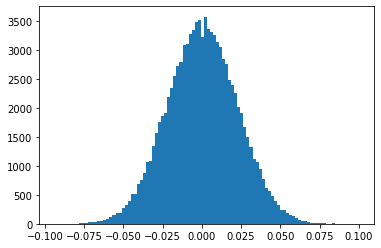

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(null_dist_ucdavis, bins=100)
plt.show()

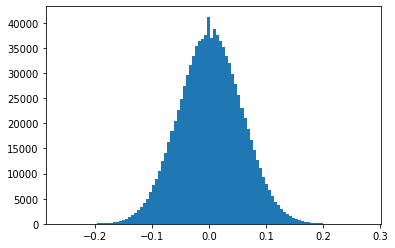

In [17]:
import matplotlib.pyplot as plt
plt.hist(null_dist, bins=100)
plt.show()

In [11]:
bin_width = 50
mVocs = False
LPF = False
LPF_analysis_bw = 20
layer_id = 2		

assembler = DNNDataAssembler(
	dataset_obj, feature_extractor, layer_id, bin_width=bin_width, mVocs=mVocs,
	LPF=LPF, LPF_analysis_bw=LPF_analysis_bw
	)

Reading raw features from /scratch/gilbreth/ahmedb/cache/ucdavis/whisper_base/whisper_base_raw_features.pkl


In [16]:
features, spikes = assembler.get_training_data()

In [17]:
predicted_response = np.concatenate(features, axis=0)
all_test_spikes = np.concatenate(spikes, axis=0)

In [18]:
print(f"Predicted response shape: {predicted_response.shape}")
print(f"Actual spikes shape: {all_test_spikes.shape}")

Predicted response shape: (15254, 512)
Actual spikes shape: (15251, 4)


In [3]:
dataloader = DataLoader(dataset_obj, feature_extractor)

In [5]:
features = dataloader.get_resampled_DNN_features(50)

Reading raw features from /scratch/gilbreth/ahmedb/cache/ucdavis/whisper_base/whisper_base_raw_features.pkl


In [37]:
features.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
spikes = dataloader.get_session_spikes()

num_diff = 0
layer_id = 2
layer_features = features[layer_id]
for stim_id in spikes.keys():
	# feature_time = features[stim_id][layer_id].shape[0]
	feature_time = layer_features[stim_id].shape[0]
	stim_spikes = spikes[stim_id]
	ch = list(stim_spikes.keys())
	spike_time = spikes[stim_id][ch[0]].shape[1] 
	if feature_time != spike_time:
		print(f"stim_id: {stim_id}, feature_time: {feature_time}, spike_time: {spike_time}")
		num_diff += 1
print(f"num_diff: {num_diff}")

num_diff: 0


In [7]:
dataset_obj.metadata.timit_dur_dict['272-mhpg0_si1720.wfm']

2.075

In [7]:
bin_width = 50/1000
delay = 0
duration = dataset_obj.metadata.timit_dur_dict['199-mdac0_si1837.wfm']+ 1e-6
print(f"duration: {duration}")
bins = np.arange(delay, delay + duration + bin_width/2, bin_width)
print(f"Number of bins: {len(bins)-1}")

n = int((duration + bin_width/2)/bin_width)
print(f"Number of bins: {n}")

duration: 1.975001
Number of bins: 40
Number of bins: 40


In [43]:
duration+ 1e-6

1.975001

In [6]:
len(spikes)

489

In [7]:
features = assembler.data_cache['features']
training_spikes = assembler.data_cache['training_spikes']

In [8]:
features.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 22

In [13]:
np.stack([spikes for spikes in training_spikes[1].values()], axis=-1).shape


(1, 37, 64)

In [11]:
training_spikes[1][0].shape

(1, 37)

In [ ]:
for stim in stim_ids:
			features_list.append(features[stim])
			# each ch_spikes has shape (n_trial, time), for unique stimuli n_trial=1
			spikes_list.append(np.stack([ch_spikes[0] for ch_spikes in training_spikes[stim].values()], axis=-1))

In [3]:
dataloader = DataLoader(dataset_obj, feature_extractor)

In [5]:
features = dataloader.get_raw_DNN_features(force_reload=False, mVocs=True)

Reading raw features from /scratch/gilbreth/ahmedb/cache/mVocs/wav2letter_modified/wav2letter_modified_raw_features.pkl


In [7]:
bin_width = 50
delay = 0
repeated = False
mVocs = False

spikes = dataset.extract_spikes(bin_width=bin_width, delay=delay, repeated=repeated, mVocs=mVocs)
stimuli = list(spikes.keys())
print(f"Num of stimuli: {len(stimuli)}")
print(f"Num of channels: {len(spikes[stimuli[0]].keys())}")
channels = list(spikes[stimuli[0]].keys())
print(f"Num repeats: {spikes[stimuli[0]][channels[0]].shape}")

Num of stimuli: 451
Num of channels: 4
Num repeats: (1, 26)


In [2]:
dataset = create_neural_dataset("ucsf", 200206)

NeuralData:  Creating object for session: 200206 ... Done.


In [5]:
bin_width = 50
delay = 0
repeated = True
mVocs = True

spikes = dataset.extract_spikes(bin_width=bin_width, delay=delay, repeated=repeated, mVocs=mVocs)

stimuli = list(spikes.keys())
print(f"Num of stimuli: {len(stimuli)}")
print(f"Num of channels: {len(spikes[stimuli[0]].keys())}")
channels = list(spikes[stimuli[0]].keys())
print(f"Num repeats: {spikes[stimuli[0]][channels[0]].shape}")

Num of stimuli: 11
Num of channels: 64
Num repeats: (15, 16)


In [ ]:
if sents is None:
	sents = self.sents
raw_spikes = {}
for x,i in enumerate(sents):
	spikes = self.retrieve_spike_counts(sent=i,win=bin_width,delay=delay)
	raw_spikes[i] = np.stack([spikes[ch] for ch in range(self.num_channels)], axis=1)

In [4]:
print(len(spikes.keys())

11

In [5]:
spikes.keys()

dict_keys([7, 9, 12, 15, 24, 29, 30, 33, 44, 45, 48])

In [6]:
len(spikes[7].keys())

64

In [7]:
spikes[7][0].shape

(15, 16)

In [3]:
training_stim_ids = dataset.get_training_stim_ids()

In [4]:
dataset.missing_trial_ids

array([], dtype=int64)

In [11]:
bin_width = 50
delay = 0
repeated = True
mVocs = False



stim_group = 'repeated' if repeated else 'unique'
stim_ids = dataset.get_stim_ids(mVocs)[stim_group]
spikes = {}

stim_id = stim_ids[0]

if not repeated:
	tr_ids = dataset.metadata.get_trials(stim_id)[:1]
else:
	tr_ids = dataset.metadata.get_trials(stim_id)

all_tr_spikes = []
for tr_id in tr_ids:

	spikes = dataset.retrieve_spike_counts(trial=tr_id, win = bin_width, delay=delay)
	all_tr_spikes.append(spikes)

num_channels = len(all_tr_spikes[0])
spikes_dict = {}
for ch in range(num_channels):
	channel_spikes = [tr_spikes[ch] for tr_spikes in all_tr_spikes]
	channel_spikes = np.stack(channel_spikes, axis=0)
	spikes_dict[ch] = channel_spikes


In [15]:
trials = dataset.get_trials(12)
trials

array([1817, 2132, 2142, 2155, 2168, 2175, 2182, 2194, 2203, 2217, 2222])

In [16]:
tr_id = trials[0]
spk = dataset.retrieve_spike_counts(trial=tr_id, win = bin_width, delay=delay)

In [17]:
spk

{0: array([1, 1, 2, 3, 4, 0, 0, 1, 2, 1, 2, 5, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1,
        0, 0, 0, 1, 0, 1], dtype=int32),
 1: array([0, 0, 0, 1, 4, 3, 3, 0, 1, 2, 0, 3, 0, 1, 1, 1, 0, 0, 3, 3, 1, 0,
        0, 0, 2, 2, 3, 1], dtype=int32),
 2: array([1, 5, 5, 2, 7, 4, 3, 1, 1, 4, 1, 2, 2, 1, 1, 1, 3, 0, 4, 3, 2, 2,
        1, 3, 2, 8, 2, 4], dtype=int32),
 3: array([0, 0, 0, 1, 3, 1, 4, 2, 3, 0, 1, 4, 2, 2, 0, 0, 0, 1, 0, 1, 2, 1,
        1, 0, 1, 1, 1, 0], dtype=int32),
 4: array([2, 1, 2, 2, 3, 0, 1, 2, 2, 0, 0, 1, 2, 1, 3, 0, 1, 0, 1, 1, 4, 3,
        0, 1, 1, 1, 2, 1], dtype=int32),
 5: array([0, 2, 2, 3, 9, 6, 7, 2, 1, 0, 2, 2, 3, 1, 0, 0, 2, 0, 0, 2, 2, 1,
        1, 1, 1, 3, 1, 2], dtype=int32),
 6: array([0, 1, 3, 5, 5, 7, 6, 1, 2, 2, 3, 8, 3, 3, 2, 0, 0, 0, 4, 1, 3, 1,
        1, 2, 0, 0, 2, 3], dtype=int32),
 7: array([0, 0, 0, 2, 8, 2, 5, 0, 2, 2, 2, 1, 2, 2, 3, 1, 0, 0, 4, 3, 4, 0,
        0, 0, 4, 3, 3, 1], dtype=int32),
 8: array([1, 1, 0, 2, 4, 0, 1, 3, 3, 4, 0, 2, 1, 3, 3, 

In [12]:
stim_ids.shape

(10,)

In [6]:
bin_width = 50
delay = 0
repeated = True
mVocs = True


stim_group = 'repeated' if repeated else 'unique'
stim_ids = dataset.get_stim_ids(mVocs)[stim_group]
if not repeated:
	tr_ids = dataset.metadata.get_mVoc_tr_id(stim_id)[:1]
else:
	tr_ids = dataset.metadata.get_mVoc_tr_id(stim_id)

all_tr_spikes = []
for tr_id in tr_ids:
	spikes = dataset.retrieve_mVocs_spike_counts(trial=tr_id, win=bin_width, delay=delay)
	all_tr_spikes.append(spikes)

num_channels = len(all_tr_spikes[0])
spikes_dict = {}
for ch in range(num_channels):
	channel_spikes = [tr_spikes[ch] for tr_spikes in all_tr_spikes]
	channel_spikes = np.stack(channel_spikes, axis=0)
	spikes_dict[ch] = channel_spikes

In [7]:
stim_id = stim_ids[0]

In [8]:
print(stim_id)

7


In [10]:
tr_ids

array([  6,  75, 111, 182, 225, 296, 352, 364, 450, 496, 524, 610, 642,
       686, 754])

In [38]:
spikes_dict[0].shape

(15, 16)

In [35]:
len(all_tr_spikes[0])

64

In [24]:
s_times[0].shape

(179,)

In [28]:
len(all_tr_spikes)

15

In [30]:
ch = 0
ch_spikes = [spikes[ch] for spikes in all_tr_spikes]

In [34]:
np.stack(ch_spikes).shape

(15, 16)

In [20]:
np.stack(all_tr_spikes, axis=-1).shape

(64, 16, 15)

In [19]:
np.stack([spike for spike in all_tr_spikes], axis=-1).shape

(64, 16, 15)

In [28]:
tr_ids

array([  0,  32,  95, 107, 195])

In [19]:
spikes[0].shape

(15,)

In [ ]:
if trials is None:
			all_trials = self.metadata.mVocTrialIds
			trials = all_trials[np.isin(all_trials, self.missing_trial_ids, invert=True)]
		raw_spikes = {}
		for tr in trials:
			spikes = self.retrieve_mVocs_spike_counts(trial=tr, win=bin_width, delay=delay)
			raw_spikes[tr] = np.stack([spks for spks in spikes.values()], axis=1)

In [14]:
mVocs_all_stim_ids = np.array(dataset.metadata.mVocs_all_stim_ids)

In [15]:
test_stim_ids = np.array(dataset.metadata.mVoc_test_stimIds)

In [16]:
mVocs_all_stim_ids.shape

(303,)

In [17]:
test_stim_ids.shape

(11,)

In [18]:
# training_stim_ids = 
mVocs_all_stim_ids[np.isin(mVocs_all_stim_ids, test_stim_ids, invert=True)].shape

(292,)

In [11]:
# mVoc_test_trIds
dataset.metadata.mVoc_test_trIds

array([  6,  75, 111, 182, 225, 296, 352, 364, 450, 496, 524, 610, 642,
       686, 754,   8, 101, 104, 159, 209, 274, 346, 377, 428, 491, 553,
       585, 630, 689, 741,  11,  91, 130, 163, 231, 290, 338, 375, 445,
       503, 526, 614, 633, 710, 746,  14,  60, 132, 190, 230, 260, 335,
       398, 461, 506, 532, 603, 660, 702, 765,  23, 103, 129, 175, 220,
       287, 351, 373, 437, 516, 556, 587, 673, 681, 735,  28,  58, 121,
       206, 235, 286, 326, 380, 455, 515, 522, 617, 666, 721, 764,  29,
        65, 138, 173, 250, 297, 355, 385, 422, 478, 549, 578, 655, 677,
       767,  33,  90, 131, 164, 242, 310, 315, 379, 447, 489, 559, 574,
       638, 716, 734,  47,  78, 143, 162, 215, 284, 320, 412, 452, 500,
       520, 577, 671, 705, 758,  48,  98, 110, 170, 222, 263, 337, 391,
       435, 498, 531, 596, 641, 700, 748,  51,  73, 117, 205, 254, 262,
       317, 366, 460, 488, 565, 602, 656, 694, 728])

In [7]:
from auditory_cortex.prep_data import DNNDataset
from auditory_cortex.neural_data.ucdavis_dataset import NeuralData
from auditory_cortex.dnn_feature_extractor import create_feature_extractor
from auditory_cortex.dataloader2 import DataLoader

# DNNDataset()

In [3]:
neural_data_dir = r'/scratch/gilbreth/ahmedb/auditory_cortex/ucdavis_data'
dataset_obj = NeuralData(neural_data_dir)

In [4]:
feature_extractor = create_feature_extractor('deepspeech2')

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/pytorch_lightning/utilities/migration/migration.py:203: PossibleUserWarning: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.1.5 to v2.0.8. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../depot/jgmakin/data/auditory_cortex/results/pretrained_weights/deepspeech2/librispeech_pretrained_v3.ckpt`
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: User

In [10]:
dataloader = DataLoader(dataset_obj, feature_extractor)

features = dataloader.get_raw_DNN_features(force_reload=True)

Reading raw features from /scratch/gilbreth/ahmedb/cache/deepspeech2/deepspeech2_raw_features.pkl
Features saved to file: /scratch/gilbreth/ahmedb/cache/deepspeech2/deepspeech2_raw_features.pkl


In [11]:
type(features)

dict

In [12]:
features.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [20]:
list(features[0].values())[0].shape

torch.Size([64, 2592])

In [5]:
bin_width = 50
model_data = DNNDataset(dataset_obj, feature_extractor, layer_id=0, bin_width=bin_width)

Reading raw features from /scratch/gilbreth/ahmedb/cache/deepspeech2/deepspeech2_raw_features.pkl


KeyError: 1

In [7]:
cache_dir

'/scratch/gilbreth/ahmedb/cache'

In [5]:
test = np.random.rand(2,2)
test = torch.tensor(test)

print(test.ndim)

2


In [2]:
from auditory_cortex.dnn_features.pretrained_models import FeatureExtractorW2L

In [3]:
feature_extractor = FeatureExtractorW2L()

Lightning automatically upgraded your loaded checkpoint from v1.6.0 to v2.0.8. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../depot/jgmakin/data/auditory_cortex/results/pretrained_weights/wav2letter_modified/Wav2letter-epoch=024-val_loss=0.37.ckpt`


In [4]:

neural_data_dir = r'/scratch/gilbreth/ahmedb/auditory_cortex/ucdavis_data'
dataset_obj = NeuralData(neural_data_dir)

# dataset = BaselineDataset(dataset_obj, bin_width=50)

In [5]:
training_stim_ids = dataset_obj.get_training_stim_ids()
testing_stim_ids = dataset_obj.get_testing_stim_ids()
all_stim_ids = np.concatenate([training_stim_ids, testing_stim_ids])

stim_audios = {}
for stim_id in all_stim_ids:
	stim_audios[stim_id] = dataset_obj.get_stim_audio(stim_id, mVocs=False)

In [6]:
features = feature_extractor.extract_features(stim_audios, sampling_rate=16000)

In [11]:
len(features[0].keys())

497

In [14]:
aud = torch.randn(10)

In [17]:
isinstance(aud, torch.Tensor)

True

In [9]:
stim_ids = dataset.training_stim_ids
dataset.data_cache['training_spikes'][stim_ids[0]]

{'WM_1': array([[2, 3, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 4, 2, 0, 0, 1, 0,
         0, 0, 0, 0]]),
 'WM_2': array([[7, 1, 1, 1, 2, 4, 4, 3, 6, 4, 2, 1, 2, 4, 3, 3, 0, 3, 4, 1, 1, 0,
         1, 1, 0, 1]]),
 'WM_3': array([[2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0]]),
 'WM_4': array([[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 6, 3]])}

In [15]:
stim_ids = dataset.training_stim_ids
training_spikes = dataset.data_cache['training_spikes']


spikes_list = []
for stim in stim_ids:
	# each ch_spikes has shape (n_trial, time), for unique stimuli n_trial=1
	spikes_list.append(np.stack([ch_spikes[0] for ch_spikes in training_spikes[stim].values()], axis=-1))

In [16]:
spikes_list[0].shape

(26, 4)

In [3]:
training_data = dataset.get_training_data()

In [4]:
len(training_data[0])

451

In [5]:
idx = 10
print(f"features shape: {training_data[0][idx].shape}")
print(f"spikes shape: {training_data[1][idx].shape}")


features shape: (42, 80)
spikes shape: (1, 42, 4)


In [8]:
testing_data = dataset.get_testing_data()

idx = 10
print(f"features shape: {testing_data[0][idx].shape}")
print(f"spikes shape: {testing_data[1].shape}")

features shape: (45, 80)
spikes shape: (3, 1697, 4)


In [12]:
np.concatenate(testing_data[0]).shape

(1697, 80)

In [8]:
spikes = dataset.extract_spikes(unique=True)

In [28]:
bin_width = 50
delay=0

bin_width /= 1000
delay /= 1000



In [43]:
duration = np.random.rand()*10
print(f"Duration: {duration}")
bins = np.arange(delay, delay + duration + bin_width/2, bin_width)
print(f"Bins: {bins.size -1}")
n_bins = int((duration + bin_width/2)/bin_width)
print(f"n_bins: {n_bins}")


Duration: 9.82545066991563
Bins: 197
n_bins: 197


In [20]:
len(list(spikes.values())[0])
# spikes

4

In [7]:
spikes

{'319-mjsw0_si1640.wfm': {'WM_1': array([[2, 3, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 4, 2, 0, 0, 1, 0,
          0, 0, 0, 0]]),
  'WM_2': array([[7, 1, 1, 1, 2, 4, 4, 3, 6, 4, 2, 1, 2, 4, 3, 3, 0, 3, 4, 1, 1, 0,
          1, 1, 0, 1]]),
  'WM_3': array([[2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0]]),
  'WM_4': array([[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 6, 3]])},
 '117-fpls0_si1590.wfm': {'WM_1': array([[1, 0, 5, 2, 4, 3, 2, 2, 3, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1,
          0, 1, 2, 0, 4, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 2, 3, 0, 2, 0]]),
  'WM_2': array([[1, 0, 3, 3, 2, 2, 1, 2, 2, 0, 2, 1, 4, 0, 4, 2, 1, 1, 0, 2, 3, 1,
          3, 2, 4, 3, 5, 2, 2, 1, 0, 2, 3, 1, 4, 0, 1, 3, 3, 5, 5, 1]]),
  'WM_3': array([[1, 2, 1, 1, 4, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 1, 0, 0, 0, 2, 1, 0, 3, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0]]),
  'WM_4': array([[0, 0, 1, 0, 4, 0, 6, 2, 2,

In [ ]:
stim_ids = dataset.get_stim_ids(mVocs=False)

In [3]:
def read_wfm(filename):
	"""
	Reads a WFM file containing 16-bit integer waveform data stored as binary,
	and returns the waveform as a NumPy array of floating-point samples in the
	range [-1, 1].
	
	Args:
		filename (str): Path to the WFM file.
		
	Returns:
		np.ndarray: Array of audio samples.
	"""
	with open(filename, "rb") as file:
		# Read the entire binary data
		binary_data = file.read()
		
		# Unpack the binary data as 16-bit integers ('h' = short, little-endian '<')
		num_samples = len(binary_data) // 2  # 2 bytes per 16-bit sample
		samples = struct.unpack(f"<{num_samples}h", binary_data)  # Little-endian 16-bit integers
	return np.array(samples, dtype=np.float32)/2**15	# Normalize to [-1, 1]

In [106]:
class stimMetaData:
	def __init__(self, data_dir):
		self.data_dir = data_dir

		self.sampling_rate = 48000
		# reading timit metadata
		self.timit_meta_file = os.path.join(data_dir, 'recanzone_timit_details.mat')
		self.timit_meta = stimMetaData.read_stim_meta(self.timit_meta_file)

		timit_mask = self.timit_meta['timit'].use.astype(bool)
		timit_durs = self.timit_meta['timit'].durSec[timit_mask]
		self.timit_ids = self.timit_meta['timit'].wfmName[timit_mask]
		self.timit_dur_dict = {stim_id: dur for stim_id, dur in zip(self.timit_ids, timit_durs)}
		# self.timit_audios = self.read_stim_audios(self.timit_ids, mVocs=False)
		self.timit_audios = {}	# no need to read in advance

		# reading mVocs metadata
		self.mVocs_meta_file = os.path.join(data_dir, 'MSL.mat')
		self.mVocs_meta = stimMetaData.read_stim_meta(self.mVocs_meta_file)
		mVocs_mask = self.mVocs_meta['MSL'].useThisSound.astype(bool)
		mVocs_durs = self.mVocs_meta['MSL'].Dur[mVocs_mask]
		self.mVocs_ids = self.mVocs_meta['MSL'].WFMname[mVocs_mask]
		self.mVocs_dur_dict = {stim_id: dur for stim_id, dur in zip(self.mVocs_ids, mVocs_durs)}
		# self.mVocs_audios = self.read_stim_audios(self.mVocs_ids, mVocs=True)
		self.mVocs_audios = {}	# no need to read in advance

	def get_stim_duration(self, stim_id, mVocs=False):
		"""Returns duration of the stimulus in seconds"""
		if mVocs:
			dur_dict = self.mVocs_dur_dict
		else:
			dur_dict = self.timit_dur_dict
		return dur_dict[stim_id]

	def get_stim_audio(self, stim_id, mVocs=False):
		"""Reads stim audio for the given stimulus id"""
		if mVocs:
			stim_audios = self.mVocs_audios
		else:
			stim_audios = self.timit_audios

		if stim_id not in stim_audios:
			if mVocs:
				stim_dir = os.path.join(self.data_dir, 'NIMH_Mvoc_WFM')
			else:
				stim_dir = os.path.join(self.data_dir, 'TIMIT_48000')
			stim_filepath = os.path.join(stim_dir, stim_id)
			stim_audio = stimMetaData.read_wfm(stim_filepath)
			stim_audios[stim_id] = stim_audio
		return stim_audios[stim_id]

	def get_sampling_rate(self):
		return self.sampling_rate


	def read_stim_audios(self, stim_ids, mVocs=False):
		"""Read the audio files for the given stimulus ids
		
		Args:
			stim_ids (list): List of stimulus ids to read
			mVocs (bool): If True, read the mVocs audio files, otherwise read the BMT3 audio files
		
		Returns:
			dict: Dictionary of stimulus ids and their corresponding audio waveforms
		"""
		if mVocs:
			stim_dir = os.path.join(self.data_dir, 'NIMH_Mvoc_WFM')
		else:
			stim_dir = os.path.join(self.data_dir, 'TIMIT_48000')
		stim_audios = {}
		for stim_id in stim_ids:
			stim_filepath = os.path.join(stim_dir, stim_id)
			stim_audio = read_wfm(stim_filepath)
			stim_audios[stim_id] = stim_audio
		return stim_audios

	@staticmethod
	def read_wfm(filename):
		"""
		Reads a WFM file containing 16-bit integer waveform data stored as binary,
		and returns the waveform as a NumPy array of floating-point samples in the
		range [-1, 1].
		
		Args:
			filename (str): Path to the WFM file.
			
		Returns:
			np.ndarray: Array of audio samples.
		"""
		with open(filename, "rb") as file:
			# Read the entire binary data
			binary_data = file.read()
			
			# Unpack the binary data as 16-bit integers ('h' = short, little-endian '<')
			num_samples = len(binary_data) // 2  # 2 bytes per 16-bit sample
			samples = struct.unpack(f"<{num_samples}h", binary_data)  # Little-endian 16-bit integers
		return np.array(samples, dtype=np.float32)/2**15	# Normalize to [-1, 1]

	@staticmethod
	def read_stim_meta(filepath):
		"""Read the stimulus metadata file"""
		stim_meta = scipy.io.loadmat(filepath, squeeze_me=True, struct_as_record=False)
		return stim_meta


In [316]:
import scipy.io 


class NeuralData:
	def __init__(self, data_dir, sess_id=0):
		self.data_dir = data_dir
		self.metadata = stimMetaData(data_dir)
		self.rec_dir = os.path.join(self.data_dir, 'Data')
		self.sess_rec_files = os.listdir(self.rec_dir)

		self.data, self.exp_tr_data, self.exp_stim_ids = self.read_sess_dataset(sess_id)

		# read stim audios for both TIMIT
		# stim_ids = dataset.get_stim_ids(mVocs=False)
		# all_stim_ids = np.concatenate([stim_ids['unique'], stim_ids['repeated']])
		# self.timit_audios = dataset.read_stim_audios(all_stim_ids, mVocs=False)

		# read stim audios for both TIMIT
		# stim_ids = dataset.get_stim_ids(mVocs=True)
		# all_stim_ids = np.concatenate([stim_ids['unique'], stim_ids['repeated']])
		# self.mVocs_audios = dataset.read_stim_audios(all_stim_ids, mVocs=True)

	def exp_name(self, mVocs=False):
		if mVocs:
			return 'BMM3'
		else:
			return 'BMT3'

	def get_stim_ids(self, mVocs=False):
		"""Get the stimulus ids (both unique and repeated) for the experiment"""
		exp_name = self.exp_name(mVocs)
		return self.exp_stim_ids[exp_name]

	def get_stim_audio(self, stim_id, mVocs=False):
		"""Reads stim audio for the given stimulus id"""
		return self.metadata.get_stim_audio(stim_id, mVocs)

	def get_stim_duration(self, stim_id, mVocs=False):
		"""Returns duration of the stimulus in seconds"""
		return self.metadata.get_stim_duration(stim_id, mVocs)

	def get_sampling_rate(self, mVocs=False):
		return self.metadata.get_sampling_rate()

	def total_stimuli_duration(self, mVocs=False):
		"""Returns the total duration of all the stimuli in the experiment,
		separately for unique and repeated stimuli"""
		stim_ids = self.get_stim_ids(mVocs)
		stim_duration = {}
		for stim_type, stim_ids in stim_ids.items():
			stim_duration[stim_type] = sum([self.get_stim_duration(stim_id, mVocs) for stim_id in stim_ids])
		return stim_duration

	def extract_spikes(self, bin_width=50, delay=0, unique=True, mVocs=False):
		"""Returns the binned spike counts for all the stimuli
		
		Args:
			bin_width: int = miliseconds specifying the time duration of each bin
			delay: int = miliseconds specifying the time delay
			unique: bool = If True, extract spikes for unique stimuli, otherwise for repeated stimuli
			mVocs: bool = If True, extract spikes for mVocs experiment, otherwise for TIMIT experiment

		Returns:
			spikes: dict of dict = {stim_id: {channel: spike_counts}}
		"""
		stim_group = 'unique' if unique else 'repeated'
		stim_ids = self.get_stim_ids(mVocs)[stim_group]
		spikes = {}
		for stim_id in stim_ids:
			spikes[stim_id] = self.stim_spike_counts(stim_id, mVocs, bin_width, delay)
		return spikes

	def stim_spike_times(self, stim_id, mVocs=False):
		"""Returns the spike times for the given channel, spike
		times are returned relative to the stimulus onset"""
		exp_name = self.exp_name(mVocs)
		exp_data = self.exp_tr_data[exp_name]

		exp_stim_ids = np.array([exp_stim_id.split('\\')[-1] for exp_stim_id in exp_data.StimulusName])
		tr_id = np.where(exp_stim_ids==stim_id)[0]
		stim_onset = exp_data.StimulusTimeOn[tr_id]
		stim_dur = self.get_stim_duration(stim_id, mVocs)
		tetrodes = ['WM_1', 'WM_2', 'WM_3', 'WM_4']
		spike_times = {}
		for tet in tetrodes:
			spk_times_all_trials = []
			for onset in stim_onset:
				spikes_mask = (dataset.data[tet].times >= onset) & (dataset.data[tet].times <= onset + stim_dur)
				spk_times_trial = dataset.data[tet].times[spikes_mask] - onset	# relative to stimulus onset
				spk_times_all_trials.append(spk_times_trial)
			spike_times[tet] = spk_times_all_trials
		return spike_times
		
	def stim_spike_counts(self, stim_id, mVocs=False, bin_width=50, delay=0):
		"""Returns the binned spike counts for the given stimulus id"""
		spike_times = self.stim_spike_times(stim_id, mVocs)
		stim_dur = self.get_stim_duration(stim_id, mVocs)
		return NeuralData.bin_spike_times(spike_times, stim_dur, bin_width, delay)

	def read_sess_dataset(self, sess_id: int=0):
		"""Specify the session number to read the recording data"""
		rec_filename = self.sess_rec_files[sess_id]
		rec_filepath = os.path.join(self.rec_dir, rec_filename)
		data =  scipy.io.loadmat(rec_filepath, squeeze_me=True, struct_as_record=False)
		
		# experiment wise trial data...
		experiments = data['TrialStimData']
		exp_tr_data = {np.unique(getattr(exp, 'StimulusType'))[0]: exp for exp in experiments}

		# get filenames of unique and repeated stimuli for each experiment
		exp_stim_ids = {}
		for exp_name, exp_data in exp_tr_data.items():
			all_stim_names = [name.split('\\')[-1] for name in getattr(exp_data, 'StimulusName')]
			num_repeats = int(exp_name[3:])
			unique_stim_names = np.array([name for name in all_stim_names if all_stim_names.count(name) == 1])
			repeated_stim_names = np.unique([name for name in all_stim_names if all_stim_names.count(name) != 1])

			stim_names = {'unique': unique_stim_names, 'repeated': repeated_stim_names}
			exp_stim_ids[exp_name] = stim_names

		return data , exp_tr_data, exp_stim_ids



	

	@staticmethod
	def bin_spike_times(s_times, duration, bin_width=50, delay=0):
		"""Given the spike time, returns bins containing number of
		spikes in the 'bin_width' durations following the stimulus onset.
		
		Args:
			s_times: dict = spike times for all the channels.
			duration: float = duration of trial presentation in seconds.
			bin_width: int = miliseconds specifying the time duration of each bin, Default=50.
			delay: int = miliseconds specifying the time delay, Default=0.
	
		Returns:
			counts: dict= Binned spike counts for all channels
		"""
		# converting to seconds
		bin_width = bin_width/1000
		delay=delay/1000
		counts = {}
		# adding bin_width//2 makes sure that last bin is created
		# if there is a duration of at least half bin_width at the end
		# i.e. partial bin at the end should be at least half of bin_width
		# to be included in the last bin
		bins = np.arange(delay, delay + duration + bin_width/2, bin_width)
		for ch, times in s_times.items():
			# for repeated stimuli, spike times will be a list
			if isinstance(times, list):
				counts_all_trials = []
				for tr_times in times:
					counts_all_trials.append(np.histogram(tr_times, bins)[0])
				counts[ch] = np.array(counts_all_trials)
			else:
				counts[ch], _ = np.histogram(times, bins)
		return counts
		

In [317]:
bin_width = 50
delay=0
bin_width = bin_width/1000
delay=delay/1000

duration = dataset.get_stim_duration(stim_id, mVocs=False)

In [320]:
bins = np.arange(delay, delay + duration + bin_width/2, bin_width)
print(f"Duration: {duration}")
print("number of bins: ", len(bins))
print(bins)

Duration: 2.038125
number of bins:  42
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05]


In [322]:
int((duration+bin_width/2)/bin_width)

41.262499999999996

In [310]:
neural_data_dir = r'/scratch/gilbreth/ahmedb/auditory_cortex/ucdavis_data'
dataset = NeuralData(neural_data_dir)

stim_ids = dataset.get_stim_ids(mVocs=False)

spikes = dataset.extract_spikes(unique=True)
# data = dataset.read_sess_dataset(0)

In [314]:
stim_ids = dataset.get_stim_ids(mVocs=False)

spikes = dataset.extract_spikes(unique=True)

In [315]:
stim_id = stim_ids['unique'][2]
spikes[stim_id]['WM_1'].shape


(1, 41)

In [293]:
stim_id = stim_ids['repeated'][1]
times = dataset.stim_spike_times(stim_id)


In [278]:
times['WM_1']

(3,)

In [268]:
stim_id = stim_ids['unique'][1]
spikes[stim_id]

{'WM_1': array([1, 0, 5, 2, 4, 3, 2, 2, 3, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 2, 0, 4, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 2, 3, 0, 2, 0]),
 'WM_2': array([1, 0, 3, 3, 2, 2, 1, 2, 2, 0, 2, 1, 4, 0, 4, 2, 1, 1, 0, 2, 3, 1,
        3, 2, 4, 3, 5, 2, 2, 1, 0, 2, 3, 1, 4, 0, 1, 3, 3, 5, 5, 1]),
 'WM_3': array([1, 2, 1, 1, 4, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 2, 1, 0, 3, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0]),
 'WM_4': array([0, 0, 1, 0, 4, 0, 6, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 3, 0, 1, 0, 1, 3, 1, 2, 0, 1, 0, 0, 1, 3, 0, 1, 2, 1, 1])}

In [269]:
stim_id = stim_ids['unique'][1]
spikes[stim_id]['WM_1'].shape

(42,)

In [259]:
exp_name = dataset.exp_name(mVocs)
exp_data = dataset.exp_tr_data[exp_name]

exp_stim_ids = np.array([exp_stim_id.split('\\')[-1] for exp_stim_id in exp_data.StimulusName])
tr_id = np.where(exp_stim_ids==stim_id)[0]				# more than 1 tr_id for repeated stimuli
stim_onset = exp_data.StimulusTimeOn[tr_id]				# more than 1 stim_onset for repeated stimuli
stim_dur = dataset.get_stim_duration(stim_id, mVocs)
tetrodes = ['WM_1', 'WM_2', 'WM_3', 'WM_4']
spike_times = {}
for tet in tetrodes:
	spk_times_all_trials = []
	for onset in stim_onset:
		spikes_mask = (dataset.data[tet].times >= onset) & (dataset.data[tet].times <= onset + stim_dur)
		spk_times_trial = dataset.data[tet].times[spikes_mask] - onset	# relative to stimulus onset
		spk_times_all_trials.append(spk_times_trial)
	spike_times[tet] = np.array(spk_times_all_trials)
return spike_times

In [261]:
for onset in stim_onset:
	print(onset)
	

1973.1417201999998


In [221]:
dataset.stim_spike_times(stim_id, mVocs=False)


{'WM_1': array([1973.16982367, 1973.17208807, 1973.20458887, 1973.21511167,
        1973.24055287, 1973.25140867, 1973.26223117, 1973.32749917,
        1973.46489497, 1973.51441207, 1973.62087217, 1973.65027607,
        1973.77038917, 1973.77485137, 1973.87062217, 1973.87624987,
        1973.89726217, 1973.94364907, 1973.96499437, 1973.97048887,
        1973.98567367, 1974.02686577, 1974.03082847, 1974.18817097]),
 'WM_2': array([1973.14528157, 1973.16372977, 1973.16396287, 1973.16616067,
        1973.16932417, 1973.17238777, 1973.18923757, 1973.20645367,
        1973.25503837, 1973.33775557, 1973.34761237, 1973.36842487,
        1973.40428897, 1973.40628697, 1973.41770887, 1973.43902087,
        1973.45740247, 1973.47008977, 1973.47072247, 1973.48990327,
        1973.50575407, 1973.50831817, 1973.52783197, 1973.55989987,
        1973.57042267, 1973.57635007, 1973.58337637, 1973.58617357,
        1973.58787187, 1973.60025947, 1973.61820817, 1973.62596707,
        1973.63269367, 1973.69

In [243]:
spikes = dataset.stim_spike_counts(stim_id, mVocs=False)

In [244]:
spikes

{'WM_1': array([2, 3, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 4, 2, 0, 0, 1, 0,
        0, 0, 0, 0]),
 'WM_2': array([7, 1, 1, 1, 2, 4, 4, 3, 6, 4, 2, 1, 2, 4, 3, 3, 0, 3, 4, 1, 1, 0,
        1, 1, 0, 1]),
 'WM_3': array([2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0]),
 'WM_4': array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 6, 3])}

In [236]:
spikes['WM_1'].shape

(26,)

In [180]:
exp_data = dataset.exp_tr_data['BMT3']

In [187]:
exp_stim_ids = np.array([exp_stim_id.split('\\')[-1] for exp_stim_id in exp_data.StimulusName])

In [188]:
exp_stim_ids

array(['319-mjsw0_si1640.wfm', '117-fpls0_si1590.wfm',
       '269-mgsl0_si534.wfm', '153-majc0_si2095.wfm',
       '225-mdrd0_si1382.wfm', '126-fsbk0_si1699.wfm',
       '403-mreb0_si745.wfm', '286-mjdg0_si1705.wfm',
       '175-mbom0_si2274.wfm', '191-mcre0_si1725.wfm',
       '285-mjde0_si463.wfm', '274-milb0_si2163.wfm',
       '405-mrem0_si961.wfm', '40-fdrd1_si1544.wfm',
       '219-mdma0_si1238.wfm', '458-mtab0_si2202.wfm',
       '377-mmws1_si1701.wfm', '176-mbpm0_si1577.wfm',
       '390-mprd0_si2061.wfm', '158-marc0_si1818.wfm',
       '316-mjrk0_si1662.wfm', '26-fcmr0_si1735.wfm',
       '396-mram0_si1905.wfm', '157-marc0_si1188.wfm',
       '301-mjlb0_si2246.wfm', '310-mjpg0_si1191.wfm',
       '93-flmc0_si2002.wfm', '122-frjb0_si1794.wfm',
       '90-fljg0_si2241.wfm', '309-mjmp0_si1535.wfm',
       '13-fcaj0_si1804.wfm', '402-mrds0_si1167.wfm',
       '493-mwew0_si731.wfm', '428-mrms0_si2100.wfm',
       '476-mtqc0_si480.wfm', '106-fmkc0_si1702.wfm',
       '384-mpeb0_si1

In [189]:

tr_id = np.where(exp_stim_ids==stim_id)[0]
stim_onset = exp_data.StimulusTimeOn[tr_id]
stim_dur = dataset.get_stim_duration(stim_id, mVocs)

In [190]:
stim_dur

1.2795

In [191]:
stim_onset

array([1973.1417202])

In [ ]:

tetrodes = ['WM_1', 'WM_2', 'WM_3', 'WM_4']
spike_times = {}
for tet in tetrodes:
	spikes_mask = (dataset.data[tet].times >= stim_onset) & (dataset.data[tet].times <= stim_onset + stim_dur)

{'WM_1': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 'WM_2': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 'WM_3': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 'WM_4': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])}

In [175]:
dataset.data['WM_1'].times

array([1.52514000e-01, 1.79020800e-01, 1.91308500e-01, ...,
       3.26112305e+03, 3.26113031e+03, 3.26113937e+03])

In [ ]:
# get_spikes
stim_id
mVocs = False

if 




In [147]:
dataset.exp_tr_data['BMT3']._fieldnames

['StimulusName',
 'StimulusTimeOn',
 'StimulusIsSimultaneous',
 'StimulusPWA',
 'StimulusType',
 'StimulusWhichTrial',
 'StimulusSpeaker',
 'StimulusDirection',
 'StimulusTrialAtten',
 'StimulusTargetdB',
 'StimulusDuration',
 'StimulusCarrierLow',
 'StimulusCarrierHigh',
 'StimulusSeed',
 'StimulusAMPhaseDeg',
 'StimulusAMDepth',
 'StimulusAMHz',
 'StimulusAMHz2',
 'StimulusTonePhaseDeg',
 'StimulusFMSweepStart',
 'StimulusFMSweepEnd',
 'StimulusCarrierType',
 'StimulusCombType',
 'StimulusCombToothBW',
 'StimulusCombToothSpacing',
 'StimulusGapInt',
 'StimulusGapMS',
 'StimulusCompleted',
 'StimulusTimeDone',
 'StimulusCountPerTrial',
 'StimulusResult',
 'StimulusAudiogramPreviousdB',
 'StimulusTimeOff',
 'TrialResult',
 'TrialCorrect',
 'TrialStartBlink',
 'TrialResponseTime',
 'InitRewardMS',
 'InitRewardTime',
 'InitRewardTrial',
 'HoldRewardMS',
 'HoldRewardTime',
 'HoldRewardTrial',
 'RewardMS',
 'RewardTime',
 'RewardTrial',
 'Error',
 'ErrorTime']

In [168]:
# stim_id = 'C:\\Stimuli\\Boilermaker\\timit\\319-mjsw0_si1640.wfm'
exp_data = dataset.exp_tr_data['BMT3']
stim_id = exp_data.StimulusName[0]
tr_id = np.where(exp_data.StimulusName ==stim_id)[0]

exp_data.StimulusTimeOn[tr_id]


array([1973.1417202])

In [167]:
exp_data.StimulusTimeOn

array([1973.1417202, 1974.5814087, 1976.8032402, 1978.9884602,
       1981.3378603, 1983.8219996, 1985.2860489, 1986.9616679,
       1988.9663094, 1991.3586702, 1992.8329278, 1994.7621485,
       1996.9719402, 1999.2946892, 2001.7482073, 2006.6835596,
       2008.9076888, 2011.1177987, 2012.8564694, 2013.9645491,
       2016.0080998, 2017.5830085, 2019.7706594, 2022.1114385,
       2023.4242503, 2025.4169186, 2030.7946577, 2032.4497195,
       2034.1045297, 2036.0583295, 2038.278348 , 2039.8676497,
       2041.5940697, 2043.4267278, 2045.5590304, 2047.7725776,
       2049.7328376, 2050.992288 , 2052.903079 , 2055.3030803,
       2056.4970592, 2061.4327371, 2062.6597681, 2063.9152188,
       2065.3771887, 2067.632039 , 2069.8400806, 2071.9144079,
       2074.1716299, 2075.6154476, 2077.0856093, 2079.0315503,
       2080.8232087, 2085.0751895, 2087.4607682, 2089.0503585,
       2090.5515373, 2092.912548 , 2093.9880788, 2095.9275596,
       2098.0450881, 2100.1890901, 2102.3910785, 2103.9

In [ ]:
StimulusDuration

In [ ]:
dataset.exp_tr_data['BMT3'].

In [150]:
dataset.exp_tr_data['BMT3'].StimulusName

array(['C:\\Stimuli\\Boilermaker\\timit\\319-mjsw0_si1640.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\117-fpls0_si1590.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\269-mgsl0_si534.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\153-majc0_si2095.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\225-mdrd0_si1382.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\126-fsbk0_si1699.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\403-mreb0_si745.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\286-mjdg0_si1705.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\175-mbom0_si2274.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\191-mcre0_si1725.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\285-mjde0_si463.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\274-milb0_si2163.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\405-mrem0_si961.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\40-fdrd1_si1544.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\219-mdma0_si1238.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\458-

In [154]:
dataset.exp_tr_data['BMM3'].StimulusWhichTrial

array([   1,    2,    3, ..., 1872, 1873, 1874], dtype=uint16)

In [ ]:
StimulusWhichTrial

In [134]:
stim_ids = dataset.get_stim_ids(mVocs)

In [135]:
stim_ids.keys()

dict_keys(['unique', 'repeated'])

In [120]:
stim_id = stim_ids['unique'][0]

In [121]:
dataset.get_stim_duration(stim_id, mVocs)

1.2795

In [128]:
stim_type = 'repeated'
stim_duration = {}

In [129]:
stim_duration[stim_type] = sum([dataset.get_stim_duration(stim_id, mVocs) for stim_id in stim_ids[stim_type]])

In [ ]:

stim_duration = {}
for stim_type, stim_ids in stim_ids.items():
	stim_duration[stim_type] = sum([self.get_stim_duration(stim_id, mVocs) for stim_id in stim_ids])
# return stim_duration

In [143]:
num_repeats = 3
trials_dur = dataset.total_stimuli_duration(mVocs=False)
total_dur = trials_dur['unique'] + trials_dur['repeated']*num_repeats
print(f"Duration of unique stimuli: {trials_dur['unique']:.2f} seconds")
print(f"Duration of repeated stimuli: {trials_dur['repeated']:.2f} seconds")
print(f"Total duration of all stimuli: {total_dur:.2f} seconds")


Duration of unique stimuli: 762.45 seconds
Duration of repeated stimuli: 84.83 seconds
Total duration of all stimuli: 1016.95 seconds


In [74]:
stim_ids[stim_mask].shape

(497,)

In [ ]:
metadata.stim_meta['timit'].durSec

In [61]:
metadata.stim_meta['timit']._fieldnames

['wfmName',
 'timitName',
 'durSec',
 'onsetCutTime',
 'offsetCutTime',
 'onsetIndexOrig',
 'offsetIndexOrig',
 'use',
 'isFemale',
 'indUsed3',
 'indUsed12',
 'indUsed',
 'attenuationSpeaker1']

In [63]:
metadata.stim_meta['timit'].wfmName

array(['1-fadg0_si1279.wfm', '2-faem0_si2022.wfm', '3-falr0_si1955.wfm',
       '4-fawf0_si1000.wfm', '5-fbcg1_si1612.wfm', '6-fbcg1_si2242.wfm',
       '7-fbjl0_si2182.wfm', '8-fbmh0_si1766.wfm', '9-fbmj0_si815.wfm',
       '10-fcag0_si1503.wfm', '11-fcag0_si1641.wfm',
       '12-fcaj0_si1479.wfm', '13-fcaj0_si1804.wfm',
       '14-fceg0_si1878.wfm', '15-fceg0_si618.wfm', '16-fcft0_si1808.wfm',
       '17-fcft0_si548.wfm', '18-fcjs0_si1607.wfm', '19-fcjs0_si2237.wfm',
       '20-fcke0_si1111.wfm', '21-fclt0_si2068.wfm',
       '22-fcmh0_si2084.wfm', '23-fcmh1_si1493.wfm',
       '24-fcmm0_si1083.wfm', '25-fcmm0_si453.wfm', '26-fcmr0_si1735.wfm',
       '27-fcmr0_si475.wfm', '28-fcrh0_si1718.wfm', '29-fcrz0_si2053.wfm',
       '30-fdas1_si2091.wfm', '31-fdaw0_si1406.wfm',
       '32-fdfb0_si1948.wfm', '33-fdfb0_si2010.wfm',
       '34-fdhc0_si2189.wfm', '35-fdjh0_si1565.wfm',
       '36-fdml0_si1779.wfm', '37-fdml0_si2075.wfm',
       '38-fdms0_si1218.wfm', '39-fdnc0_si2287.wfm',
     

In [62]:
metadata.stim_meta['timit'].timitName

array(['fadg0_si1279', 'faem0_si2022', 'falr0_si1955', 'fawf0_si1000',
       'fbcg1_si1612', 'fbcg1_si2242', 'fbjl0_si2182', 'fbmh0_si1766',
       'fbmj0_si815', 'fcag0_si1503', 'fcag0_si1641', 'fcaj0_si1479',
       'fcaj0_si1804', 'fceg0_si1878', 'fceg0_si618', 'fcft0_si1808',
       'fcft0_si548', 'fcjs0_si1607', 'fcjs0_si2237', 'fcke0_si1111',
       'fclt0_si2068', 'fcmh0_si2084', 'fcmh1_si1493', 'fcmm0_si1083',
       'fcmm0_si453', 'fcmr0_si1735', 'fcmr0_si475', 'fcrh0_si1718',
       'fcrz0_si2053', 'fdas1_si2091', 'fdaw0_si1406', 'fdfb0_si1948',
       'fdfb0_si2010', 'fdhc0_si2189', 'fdjh0_si1565', 'fdml0_si1779',
       'fdml0_si2075', 'fdms0_si1218', 'fdnc0_si2287', 'fdrd1_si1544',
       'fdrw0_si1423', 'fdxw0_si1511', 'fdxw0_si2141', 'feac0_si1245',
       'fear0_si1882', 'fedw0_si1653', 'feeh0_si471', 'feme0_si2135',
       'fetb0_si1148', 'fgcs0_si856', 'fgdp0_si1618', 'fgjd0_si1179',
       'fgmd0_si2107', 'fgrw0_si1990', 'fhlm0_si1560', 'fisb0_si2209',
       'fjas0

In [52]:
len(dataset.timit_audios.keys())


497

In [53]:
len(dataset.mVocs_audios.keys())

1568

In [45]:
stim_id = next(iter(stim_audios))
audio = stim_audios[stim_id]

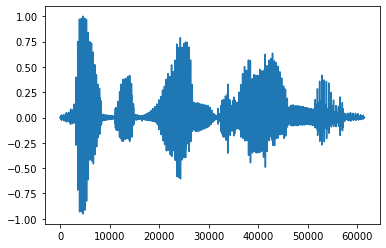

In [48]:
plt.plot(audio)

In [47]:
from IPython.display import Audio
Audio(audio, rate=48000)

In [15]:
dataset.get_stim_ids(mVocs=True)['unique'][0]

'8-Cue-110-Coo.wfm'

In [32]:
def read_stim_audios(stim_ids):
	stim_audios = {}
	for stim_id in stim_ids:
		stim_name = stim_id.split('\\')[-1]
		stim_filepath = os.path.join(neural_data_dir, 'Stimuli', stim_name)
		stim_audio = read_wfm(stim_filepath)
		stim_audios[stim_id] = stim_audio
	return stim_audios

(497,)

In [20]:
len(stim_ids['unique'])

451

In [24]:
np.unique(stim_ids['unique']).shape

(451,)

In [21]:
len(stim_ids['repeated'])

138

In [25]:
np.unique(stim_ids['repeated']).shape

(46,)

In [23]:
np.unique(all_stim_ids).shape

(497,)

In [18]:
len(all_stim_ids)

589

In [106]:
dataset.exp_tr_data

{'BMM3': <scipy.io.matlab.mio5_params.mat_struct at 0x2adf71f38e80>,
 'BMT3': <scipy.io.matlab.mio5_params.mat_struct at 0x2adf71f388e0>}

In [ ]:
dataset.exp_stim_names

In [81]:
experiments = data['TrialStimData']
exp_tr_data = {np.unique(getattr(exp, 'StimulusType'))[0]: exp for exp in experiments}



In [ ]:
data['']

In [96]:
exp_name = 'BMT3'

In [100]:
int(exp_name[3:])

3

In [102]:
len(repeated_stim_names)

138

In [103]:
len(unique_stim_names)

451

In [94]:
all_stim_names.count('178-mbth0_si757.wfm')

1

In [84]:
exp_tr_data['BMT3']._fieldnames

['StimulusName',
 'StimulusTimeOn',
 'StimulusIsSimultaneous',
 'StimulusPWA',
 'StimulusType',
 'StimulusWhichTrial',
 'StimulusSpeaker',
 'StimulusDirection',
 'StimulusTrialAtten',
 'StimulusTargetdB',
 'StimulusDuration',
 'StimulusCarrierLow',
 'StimulusCarrierHigh',
 'StimulusSeed',
 'StimulusAMPhaseDeg',
 'StimulusAMDepth',
 'StimulusAMHz',
 'StimulusAMHz2',
 'StimulusTonePhaseDeg',
 'StimulusFMSweepStart',
 'StimulusFMSweepEnd',
 'StimulusCarrierType',
 'StimulusCombType',
 'StimulusCombToothBW',
 'StimulusCombToothSpacing',
 'StimulusGapInt',
 'StimulusGapMS',
 'StimulusCompleted',
 'StimulusTimeDone',
 'StimulusCountPerTrial',
 'StimulusResult',
 'StimulusAudiogramPreviousdB',
 'StimulusTimeOff',
 'TrialResult',
 'TrialCorrect',
 'TrialStartBlink',
 'TrialResponseTime',
 'InitRewardMS',
 'InitRewardTime',
 'InitRewardTrial',
 'HoldRewardMS',
 'HoldRewardTime',
 'HoldRewardTrial',
 'RewardMS',
 'RewardTime',
 'RewardTrial',
 'Error',
 'ErrorTime']

In [74]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Nov 13 16:41:49 2024',
 '__version__': '1.0',
 '__globals__': [],
 'TrialStimData': array([<scipy.io.matlab.mio5_params.mat_struct object at 0x2adf7211b6a0>,
       dtype=object),
 'WM_1': <scipy.io.matlab.mio5_params.mat_struct at 0x2adf7211b700>,
 'WM_2': <scipy.io.matlab.mio5_params.mat_struct at 0x2adf722c1370>,
 'WM_3': <scipy.io.matlab.mio5_params.mat_struct at 0x2adf71f90430>,
 'WM_4': <scipy.io.matlab.mio5_params.mat_struct at 0x2adf722cc880>}

In [68]:
recordings_dir = os.path.join(neural_data_dir, 'Data')
os.listdir(recordings_dir)

['relayz_2024-10-28b_boilermaker.mat']

In [31]:
timit_dir = os.path.join(neural_data_dir, 'TIMIT_48000')
filenames = os.listdir(timit_dir)

In [43]:
filepath = os.path.join(timit_dir, filenames[0])
timit = read_wfm(filepath)

In [44]:
timit.dtype

dtype('float32')

In [45]:
from IPython.display import Audio
Audio(timit, rate=48000)

Text(0.5, 0, 'seconds')

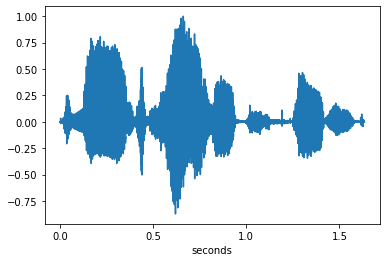

In [46]:
# timit
plt.plot(timit)
ticks_labels = np.arange(0, len(timit)/48000, 0.5)
ticks = ticks_labels*48000
plt.xticks(ticks, ticks_labels)
plt.xlabel('seconds')

In [47]:
timit_dir = os.path.join(neural_data_dir, 'NIMH_Mvoc_WFM')
filenames = os.listdir(timit_dir)

In [48]:
len(filenames)

3040

In [4]:
timit_metadata = 'recanzone_timit_details.mat'
timit_metadata_path = os.path.join(neural_data_dir, timit_metadata)
metadata = scipy.io.loadmat(timit_metadata_path, squeeze_me=True, struct_as_record=False)

In [5]:
metadata

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Sep 27 14:43:06 2024',
 '__version__': '1.0',
 '__globals__': [],
 'note': 'onset/offsetCutTime refers to the literal time used as onset/offset from the original TIMIT file.  onset/offsetIndexOrig refers to the index of the first/last point used from the ORIGINAL file (files subsequently upsampled to 48 kHz for this experiment.  All stimuli given a 5 ms cos^2 onset/offset ramp.',
 'timit': <scipy.io.matlab.mio5_params.mat_struct at 0x2adf3e77f2e0>}

In [6]:
timit_details = metadata['timit']

In [7]:
timit_details._fieldnames

['wfmName',
 'timitName',
 'durSec',
 'onsetCutTime',
 'offsetCutTime',
 'onsetIndexOrig',
 'offsetIndexOrig',
 'use',
 'isFemale',
 'indUsed3',
 'indUsed12',
 'indUsed',
 'attenuationSpeaker1']

In [38]:
np.sum(timit_details.use)

497

In [42]:
all_stim = timit_details.wfmName
for stim_name in all_stim:
	

In [52]:
stim_not_used = []
stim_presented = [stim_name.split('\\')[-1] for stim_name in session_data['TrialStimData'][1].StimulusName]
all_stim = timit_details.wfmName
for stim_name in all_stim:
	if stim_name not in stim_presented:
		stim_not_used.append(stim_name)
print(len(stim_not_used))


2


In [55]:
stim_presented = [stim_name.split('\\')[-1] for stim_name in session_data['TrialStimData'][1].StimulusName]
stim_trial_counts = {stim: stim_presented.count(stim) for stim in set(stim_presented)}

In [57]:
unique_presentation = [stim for stim, count in stim_trial_counts.items() if count == 1]
repeat_presentation = [stim for stim, count in stim_trial_counts.items() if count != 1]


In [58]:
len(repeat_presentation)

46

In [59]:
len(unique_presentation)

451

In [54]:
stim_not_used

['27-fcmr0_si475.wfm', '312-mjpm1_si2280.wfm']

In [40]:
stim_not_used = []
filenames_used = []
for i in range(1,499):
	if i not in stim_list:
		stim_not_used.append(i)
	

print(f"Stimulus not used: {stim_not_used}")


Stimulus not used: [27, 312]


In [26]:
timit_details.indUsed._fieldnames

['maleRepeat', 'femaleRepeat', 'maleUnique', 'femaleUnique']

In [28]:
timit_details.indUsed.maleRepeat.shape

(33,)

In [28]:
stim_list = []
total_stim = 0
for stim_cat in timit_details.indUsed3._fieldnames:
	# print(stim_cat)
	stim_ids = getattr(timit_details.indUsed3, stim_cat)
	stim_list.append(stim_ids)
	total_stim += stim_ids.shape[0]
stim_list = np.concatenate(stim_list)
print(f"There are {total_stim} stimuli in the TIMIT dataset.")

There are 497 stimuli in the TIMIT dataset.


In [30]:
np.unique(stim_list).shape

(497,)

In [60]:
repeat_presentation

['292-mjeb0_si656.wfm',
 '360-mmdm1_si2043.wfm',
 '396-mram0_si1905.wfm',
 '124-fsah0_si1874.wfm',
 '308-mjmm0_si625.wfm',
 '362-mmds0_si1973.wfm',
 '263-mges0_si1481.wfm',
 '53-fgmd0_si2107.wfm',
 '189-mcmb0_si1898.wfm',
 '206-mdhs0_si1530.wfm',
 '491-mwem0_si1950.wfm',
 '164-mbcg0_si486.wfm',
 '440-mrxb0_si1585.wfm',
 '148-mabw0_si2294.wfm',
 '404-mreh1_si2229.wfm',
 '193-mctm0_si720.wfm',
 '394-mrab0_si1224.wfm',
 '412-mrgg0_si1199.wfm',
 '16-fcft0_si1808.wfm',
 '402-mrds0_si1167.wfm',
 '174-mbom0_si1644.wfm',
 '145-fvkb0_si1789.wfm',
 '4-fawf0_si1000.wfm',
 '186-mcem0_si1398.wfm',
 '340-mklt0_si583.wfm',
 '401-mrdm0_si1595.wfm',
 '195-mctw0_si2003.wfm',
 '278-mjar0_si2247.wfm',
 '72-fjsp0_si804.wfm',
 '138-ftaj0_si1329.wfm',
 '387-mpgh0_si924.wfm',
 '187-mchh0_si1634.wfm',
 '103-fmjf0_si1254.wfm',
 '315-mjrh0_si1125.wfm',
 '151-maeo0_si1956.wfm',
 '13-fcaj0_si1804.wfm',
 '142-ftmg0_si2162.wfm',
 '373-mmrp0_si2034.wfm',
 '153-majc0_si2095.wfm',
 '240-meal0_si2177.wfm',
 '183-mccs0_s

In [22]:
filenames_maleRepeat = timit_details.indUsed3.maleRepeat

(36,)

In [62]:
np.min(timit_details.indUsed3.maleRepeat)

148

In [63]:
np.min(timit_details.indUsed3.femaleRepeat)

13

In [64]:
np.min(timit_details.indUsed3.maleUnique)

146

In [65]:
np.min(timit_details.indUsed3.femaleUnique)

1

In [60]:
timit_details.indUsed12.maleRepeat.shape

(15,)

In [62]:
timit_details.indUsed12.femaleRepeat.shape

(6,)

In [63]:
timit_details.indUsed12.femaleRepeat.shape

(6,)

In [64]:
timit_details.indUsed12.maleUnique.shape

(338,)

In [20]:
timit_details.indUsed12.femaleUnique

['maleRepeat', 'femaleRepeat', 'maleUnique', 'femaleUnique']

In [8]:
session = 'relayz_2024-10-28b_boilermaker.mat'
session_path = os.path.join(neural_data_dir, 'Data', session)
session_data = scipy.io.loadmat(session_path, squeeze_me=True, struct_as_record=False)

In [32]:
session_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'TrialStimData', 'WM_1', 'WM_2', 'WM_3', 'WM_4'])

In [37]:
session_data['WM_1'].codes.shape

(59902,)

In [54]:
np.max(session_data['WM_1'].times)

3261.1393661611396

In [56]:
np.max(session_data['WM_2'].times)

3261.129143061129

In [39]:
session_data['WM_2'].times.shape

(118198,)

In [44]:
np.unique(session_data['WM_1'].codes).shape

(3,)

In [10]:
session_data['TrialStimData'][0]._fieldnames

['StimulusName',
 'StimulusTimeOn',
 'StimulusIsSimultaneous',
 'StimulusPWA',
 'StimulusType',
 'StimulusWhichTrial',
 'StimulusSpeaker',
 'StimulusDirection',
 'StimulusTrialAtten',
 'StimulusTargetdB',
 'StimulusDuration',
 'StimulusCarrierLow',
 'StimulusCarrierHigh',
 'StimulusSeed',
 'StimulusAMPhaseDeg',
 'StimulusAMDepth',
 'StimulusAMHz',
 'StimulusAMHz2',
 'StimulusTonePhaseDeg',
 'StimulusFMSweepStart',
 'StimulusFMSweepEnd',
 'StimulusCarrierType',
 'StimulusCombType',
 'StimulusCombToothBW',
 'StimulusCombToothSpacing',
 'StimulusGapInt',
 'StimulusGapMS',
 'StimulusCompleted',
 'StimulusTimeDone',
 'StimulusCountPerTrial',
 'StimulusResult',
 'StimulusAudiogramPreviousdB',
 'StimulusTimeOff',
 'TrialResult',
 'TrialCorrect',
 'TrialStartBlink',
 'TrialResponseTime',
 'InitRewardMS',
 'InitRewardTime',
 'InitRewardTrial',
 'HoldRewardMS',
 'HoldRewardTime',
 'HoldRewardTrial',
 'RewardMS',
 'RewardTime',
 'RewardTrial',
 'Error',
 'ErrorTime']

In [34]:
session_data['TrialStimData'][1].StimulusName

array(['C:\\Stimuli\\Boilermaker\\timit\\319-mjsw0_si1640.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\117-fpls0_si1590.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\269-mgsl0_si534.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\153-majc0_si2095.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\225-mdrd0_si1382.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\126-fsbk0_si1699.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\403-mreb0_si745.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\286-mjdg0_si1705.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\175-mbom0_si2274.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\191-mcre0_si1725.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\285-mjde0_si463.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\274-milb0_si2163.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\405-mrem0_si961.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\40-fdrd1_si1544.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\219-mdma0_si1238.wfm',
       'C:\\Stimuli\\Boilermaker\\timit\\458-

In [20]:
np.unique(session_data['TrialStimData'][1].StimulusType)

array(['BMT3'], dtype=object)

In [21]:
np.unique(session_data['TrialStimData'][1].StimulusTimeOn).shape

(589,)

In [16]:
np.unique(session_data['TrialStimData'][1].StimulusType)

array(['BMT3'], dtype=object)

In [9]:
session_data['TrialStimData']

array([<scipy.io.matlab.mio5_params.mat_struct object at 0x2adf3ec22ee0>,
      dtype=object)

In [51]:
session_data['TrialStimData'][0].StimulusName.shape

(1874,)

In [52]:
session_data['TrialStimData'][1].StimulusName.shape

(589,)